Housing Prices Worksheet

Predicts Housing Prices Using Housing Prices.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

Importing the Datasets

In [2]:
train_set = pd.read_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\train.csv")
test_set = pd.read_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\test.csv")


Display Training Datasets

In [3]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Replace Missing Values

In [4]:
features = ['LotArea', "LotFrontage", 'OverallQual', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', "YearBuilt", 'MSSubClass', "WoodDeckSF", "GrLivArea", "TotalBsmtSF", "YearRemodAdd", "OverallCond"]
# Fill in the lines below: imputation
my_imputer = SimpleImputer()# Your code here

train_set = train_set.fillna(0)

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_set[features]))
imputed_X_valid = pd.DataFrame(my_imputer.transform(test_set[features]))

# Fill in the lines below: imputation removed column names; put them back

imputed_X_valid.columns = test_set[features].columns
train_set.columns = train_set.columns



Defining Functions

In [5]:
def tooLarge(lotArea, amount):
    tooLarge = []
    tooLarge_ID = []
    i = 0
    for i in range(len(lotArea)):
        try:
            if lotArea[i] > amount:
                tooLarge_ID.append(i)
        except KeyError:
            i = 1 + 1
                
    return tooLarge_ID

def printMatches(dataset, ids):
    ids = np.array(ids)
    print(dataset.iloc[ids])       
    return

def neighCoding(neighbor):
    neighbor = neighbor.copy()
    misspelling = []
    for n in range(len(neighbor)):
        try:
            if neighbor.iloc[n] == "Blmngtn":
                neighbor.iloc[n] = 1
            elif neighbor.iloc[n] == "Blueste":
                neighbor.iloc[n] = 2
            elif neighbor.iloc[n] == "BrDale":
                neighbor.iloc[n] = 3
            elif neighbor.iloc[n] == "BrkSide":
                neighbor.iloc[n] = 4
            elif neighbor.iloc[n] == "ClearCr":
                neighbor.iloc[n] = 5
            elif neighbor.iloc[n] == "CollgCr":
                neighbor.iloc[n] = 6
            elif neighbor.iloc[n] == "Crawfor":
                neighbor.iloc[n] = 7
            elif neighbor.iloc[n] == "Edwards":
                neighbor.iloc[n] = 8
            elif neighbor.iloc[n] == "Gilbert":
                neighbor.iloc[n] = 9
            elif neighbor.iloc[n] == "IDOTRR":
                neighbor.iloc[n] = 10
            elif neighbor.iloc[n] == "MeadowV":
                neighbor.iloc[n] = 11
            elif neighbor.iloc[n] == "Mitchel":
                neighbor.iloc[n] = 12
            elif neighbor.iloc[n] == "NAmes":
                neighbor.iloc[n] = 13
            elif neighbor.iloc[n] == "NoRidge":
                neighbor.iloc[n] = 14
            elif neighbor.iloc[n] == "NPkVill":
                neighbor.iloc[n] = 15
            elif neighbor.iloc[n] == "NridgHt":
                neighbor.iloc[n] = 16
            elif neighbor.iloc[n] == "NWAmes":
                neighbor.iloc[n] = 17
            elif neighbor.iloc[n] == "OldTown":
                neighbor.iloc[n] = 18
            elif neighbor.iloc[n] == "SWISU":
                neighbor.iloc[n] = 19
            elif neighbor.iloc[n] == "Sawyer":
                neighbor.iloc[n] = 20
            elif neighbor.iloc[n] == "SawyerW":
                neighbor.iloc[n] = 21
            elif neighbor.iloc[n] == "Somerst":
                neighbor.iloc[n] = 22
            elif neighbor.iloc[n] == "StoneBr":
                neighbor.iloc[n] = 23
            elif neighbor.iloc[n] == "Timber":
                neighbor.iloc[n] = 24
            elif neighbor.iloc[n] == "Veenker":
                neighbor.iloc[n] = 25
        except KeyError:
            n = n + 1
    return neighbor
        

Recoding Neighborhood Data For Analysis

In [6]:
train_set["Neighborhood"] = neighCoding(train_set["Neighborhood"])

Plotting Neighborhood Data with Price Data

In [7]:
train_set["Neighborhood"].head()

0     6
1    25
2     6
3     7
4    14
Name: Neighborhood, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

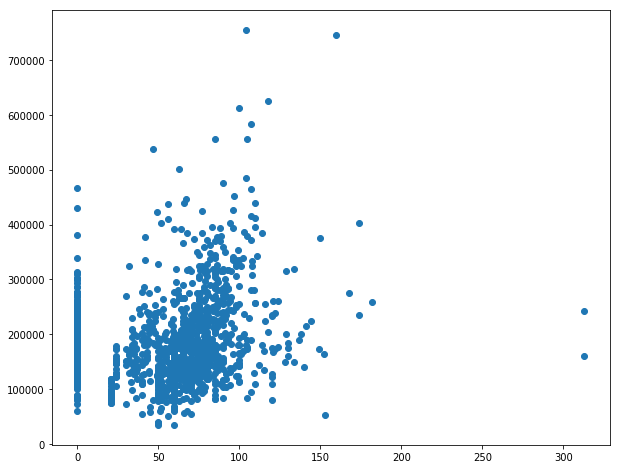

In [8]:
plt.figure(figsize = (10,8))
plt.scatter(train_set["LotFrontage"], train_set["SalePrice"])
plt.show

Finding Outliers in 1st Floor Area

In [9]:
large1stArea = []
large1stArea = (tooLarge(train_set["1stFlrSF"], 4000))
printMatches(train_set, large1stArea)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave     0      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd      0           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]


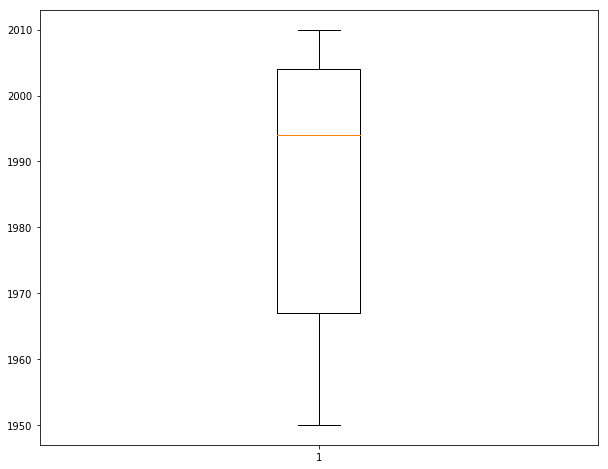

In [10]:
plt.figure(figsize = (10,8))
plt.boxplot(train_set["YearRemodAdd"])
plt.show()

Finding Outliers with Lot Area

In [11]:
largeLotArea = []
largeLotArea = (tooLarge(train_set["LotArea"], 100000))
printMatches(train_set, largeLotArea)


      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249  250          50       RL          0.0   159000   Pave     0      IR2   
313  314          20       RL        150.0   215245   Pave     0      IR3   
335  336         190       RL          0.0   164660   Grvl     0      IR1   
706  707          20       RL          0.0   115149   Pave     0      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
249         Low    AllPub  ...        0      0      0        Shed     500   
313         Low    AllPub  ...        0      0      0           0       0   
335         HLS    AllPub  ...        0      0      0        Shed     700   
706         Low    AllPub  ...        0      0      0           0       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
249      6   2007        WD         Normal     277000  
313      6   2009        WD         Normal     375000  
335      8   2008        WD         Normal     228950  
706 

Finding Frontage Outliers

In [12]:
largeFrontage = []
largeFrontage = (tooLarge(train_set["LotFrontage"], 300))
printMatches(train_set, largeFrontage)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave     0      IR2   
1298  1299          60       RL        313.0    63887   Pave     0      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0      0      0           0       0   
1298         Bnk    AllPub  ...      480     Gd      0           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]


Finding Outliers in Price Data

In [13]:
highPricesID = []
highPricesID = tooLarge(train_set["SalePrice"], 700000)
printMatches(train_set, highPricesID)

train_set["OverallQual"].iloc[highPricesID]

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave     0      IR1   
1182  1183          60       RL        160.0    15623   Pave     0      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0      0      0           0       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]


691     10
1182    10
Name: OverallQual, dtype: int64

Dropping the outlier rows

In [14]:
train_set = train_set.drop(highPricesID)
train_set = train_set.drop(largeLotArea)
train_set = train_set.drop(large1stArea)


In [15]:
sum(train_set["MSSubClass"].isna())

0

Seperating Training data with the labels

In [16]:
X = train_set.drop(['Id'], axis=1)
Y = train_set["SalePrice"]

In [17]:
train, test, train_labels, test_labels = train_test_split(X, Y, test_size = 0.30)

In [18]:
train_labels = np.array(train_labels)

Testing Regression

Scenario One: All Variables

In [19]:
features = ['LotArea', 'LotFrontage', 'OverallQual', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', "YearBuilt", 'MSSubClass', "WoodDeckSF", "GrLivArea", "TotalBsmtSF", "YearRemodAdd", "OverallCond"]

X1 = sm.add_constant(train[features])
reg = sm.OLS(train_labels, X1).fit()

reg.summary()

C:\Users\Malcolm Wright\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     357.9
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:54:24   Log-Likelihood:                -12001.
No. Observations:                1017   AIC:                         2.403e+04
Df Residuals:                    1003   BIC:                         2.410e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.233e+06   1.26e+05     -9.788      0.000   -1.48e+06   -9.85e+05
LotArea          1.2131      0.213      5.688      0.000       0.795       1.632
LotFrontage     49.7268     31.714      1.568      0.117     -12.506     111.959
OverallQual    1.63e+04   1230.560     13.244      0.000    1.39e+04    1.87e+04
BedroomAbvGr -1.152e+04   1843.094     -6.249      0.000   -1.51e+04   -7901.457
TotRmsAbvGrd  4377.4011   1344.007      3.257      0.001    1740.012    7014.790
GarageArea      29.2764      6.349      4.611      0.000      16.818      41.735
YearBuilt      496.0999     57.054      8.695      0.000     384.140     608.060
MSSubClass     -98.0513     28.290     -3.466      0.001    -153.566     -42.536
WoodDeckSF      23.9366      8.831      2.711      0.007       6.608      41.266
GrLivArea       51.4394      4.468     11.512      0.000      42.671      60.207
TotalBsmtSF     28.3473      3.294      8.605      0.000      21.883      34.812
YearRemodAdd    89.3561     71.060      1.257      0.209     -50.087     228.799
OverallCond   5280.2021   1102.504      4.789      0.000    3116.724    7443.680
==============================================================================
Omnibus:                      297.853   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21479.365
Skew:                          -0.351   Prob(JB):                         0.00
Kurtosis:                      25.503   Cond. No.                     1.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Scenario Two

In [20]:
X1 = sm.add_constant((train[["LotFrontage"]]))
reg = sm.OLS(train_labels, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     43.78
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           5.92e-11
Time:                        17:54:24   Log-Likelihood:                -12859.
No. Observations:                1017   AIC:                         2.572e+04
Df Residuals:                    1015   BIC:                         2.573e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.539e+05   4577.970     33.622      0.000    1.45e+05    1.63e+05
LotFrontage   451.3196     68.206      6.617      0.000     317.478     585.161
==============================================================================
Omnibus:                      300.919   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.032
Skew:                           1.467   Prob(JB):                    9.01e-199
Kurtosis:                       6.593   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Random Forests

In [21]:
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train[features], train_labels)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(test[features])
val_mae = mean_absolute_error(val_predictions, test_labels)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 26,756


In [22]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train[features], train_labels)

val_predictions = iowa_model.predict(test[features])
val_mae = mean_absolute_error(val_predictions, test_labels)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 23,880


Preparing Submissions

In [23]:

#sub_data["Neighborhood"] = neighCoding(sub_data["Neighborhood"])



Empty DataFrame
Columns: [LotArea, LotFrontage, OverallQual, BedroomAbvGr, TotRmsAbvGrd, GarageArea, YearBuilt, MSSubClass, WoodDeckSF, GrLivArea, TotalBsmtSF, YearRemodAdd, OverallCond]
Index: []
Empty DataFrame
Columns: [LotArea, LotFrontage, OverallQual, BedroomAbvGr, TotRmsAbvGrd, GarageArea, YearBuilt, MSSubClass, WoodDeckSF, GrLivArea, TotalBsmtSF, YearRemodAdd, OverallCond]
Index: []


In [24]:
sub_predictions = iowa_model.predict(imputed_X_valid)
sub_predictions

array([120654.05      , 156071.42857143, 148714.28571429, ...,
       136126.5625    , 106829.77777778, 222076.66666667])

In [25]:
sub_predictions = pd.DataFrame(sub_predictions, index = test_set["Id"], columns = ["SalePrice"])
sub_predictions.head()

,SalePrice
Id,
1461,120654.050000
1462,156071.428571
1463,148714.285714
1464,177593.482759
1465,212000.000000


Export Submission

In [26]:
sub_predictions.to_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\Submission.csv")